# Case study on Supervised learning

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment

In [2]:
#reading dataset
data=pd.read_excel('iris (2).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dataset shape
data.shape

(150, 5)

In [4]:
#columns in the dataset
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking null values in the dataset
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#describing the dataset
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

In [8]:
#filling the missing values with median function
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
#checking null values after filling
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

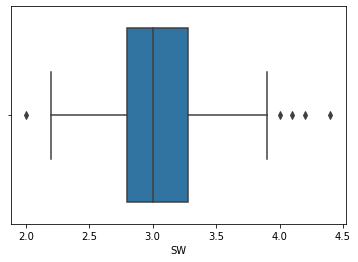

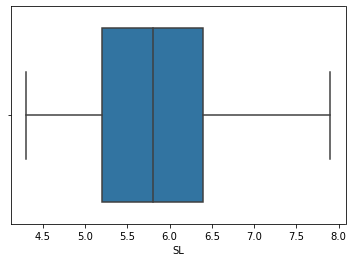

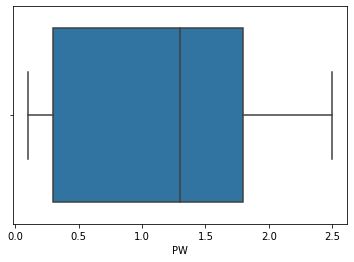

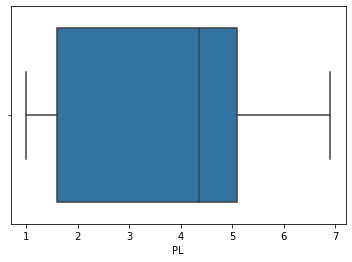

In [10]:
#plotting boxplots for checking outliers
for i in ['SW','SL', 'PW','PL']:
    #plt.title(i)
    sns.boxplot(x=data[i])
    plt.show() 

In [11]:
#removing outliers
q1 = np.percentile(data['SW'],25,interpolation='midpoint')
q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [12]:
IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

In [13]:
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

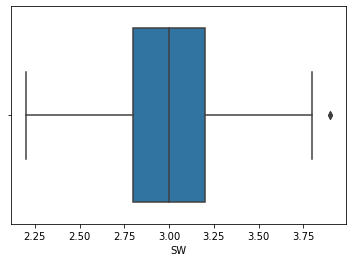

In [14]:
#boxplot after removing outliers
sns.boxplot(x=data['SW'])

In [15]:
#label encoding
x=data.drop(['Classification'],axis=1) #Splitting the data set into target and features
y=data['Classification']
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [16]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

#### Logistic Regression

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8918918918918919
precision is : 0.8834498834498835
recall is : 0.8915343915343915
F1 score is : 0.8839506172839506


In [20]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### KNN

In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

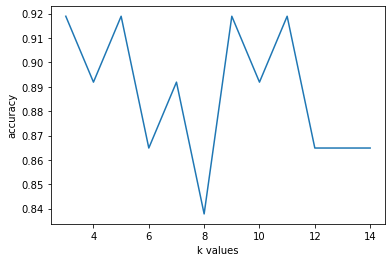

In [22]:
plt.plot(neighbors,acc_val)
plt.xlabel('k values')
plt.ylabel("accuracy")

In [23]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [24]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9095238095238095
recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [25]:
temp.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### Random Forest

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

In [27]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [28]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### Gradient Booster

In [29]:
#Gradient Booster
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)

In [30]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [31]:
temp.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### SVM

In [32]:
#SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [33]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [34]:
temp.append(['SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### Polynomial SVM

In [35]:
## polynomial svm
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [36]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [37]:
temp.append(['polynomial svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

#### Radial SVM

In [38]:
## radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [39]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8648648648648649
precision is : 0.861111111111111
recall is : 0.8677248677248678
F1 score is : 0.8570071903405238


In [40]:
temp.append(['Radial SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [41]:
df = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.88395,0.89189,0.88345,0.89153
1,KNN,0.91121,0.91892,0.90952,0.91534
2,Random Forest,0.93915,0.94595,0.93915,0.93915
3,Gradient Booster,0.93915,0.94595,0.93915,0.93915
4,SVM,0.91033,0.91892,0.90769,0.91534
5,polynomial svm,0.93912,0.94595,0.94074,0.93915
6,Radial SVM,0.85701,0.86486,0.86111,0.86772


## Random Forest has highest F1 score (0.93915) and accuracy(0.94595) 

## Polynomial SVM is also a better one